In [112]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


df = pd.read_excel("REM_Fullbase_No_Names.xlsx") #считываю инф с файла


In [113]:
df


,VypYear,DD,BestStud,BestIndProj,BestGroupProj,SrBall,Target_Class,GraduStepen,Company,PostYear,...,Cityname,Universityname,Facultyname,graduateyear,averagemark,englishmark,sex,marriagestatus,ifwork,selfpiad
0,2007,0,0,0,0,56.0,2,PgD,Сибнефть-Ноябрьскнефтегаз,NaN,...,Саратов,Саратовский государственный университет,"Геологии, геоинформатики и геоэкологии",2003-00-00 00:00:00,4.80,52.0,0,0,0,0
1,2007,0,0,0,0,64.0,2,MSc,ТомскНИПИнефть,NaN,...,Томск,Томский государственный университет,Геолого-географический,2004-00-00 00:00:00,4.90,52.0,1,0,0,0
2,2009,0,0,0,1,65.0,2,MSc,ТНК-ВР,NaN,...,Казань,Казанский Государственный университет,Геологический,2004-00-00 00:00:00,5.00,0.0,0,0,0,0
3,2013,0,0,0,0,64.1,2,MSc,ООО «Газпромнефть НТЦ»,Главный специалист отдела региональных исследо...,...,Новосибирск,Новосибирский государственный университет,Геолого-геофизический,2002-00-00 00:00:00,4.20,0.0,0,0,0,0
4,2007,0,0,0,0,54.0,3,PgD,Красноярскгеофизика,NaN,...,Томск,Сибирский государственный аэрокосмический унив...,Информатики и систем управления,2005-00-00 00:00:00,4.20,52.0,0,0,0,0
5,2007,0,0,0,0,61.0,2,MSc,ТНК-ВР менеджмент,NaN,...,Новосибирск,Новосибирский государственный университет,--,2004-00-00 00:00:00,4.50,0.0,1,0,0,0
6,2007,0,0,0,0,66.0,2,MSc,Роснефть НТЦ,NaN,...,Новосибирск,Новосибирский государственный университет,Геолого-геофизический,2005-00-00 00:00:00,4.20,60.0,0,0,0,0
7,2008,1,0,1,0,69.0,2,MSc,ТНК-ВР,NaN,...,Томск,Национальный исследовательский Томский политех...,Химико-технологический,2004-00-00 00:00:00,4.60,52.0,0,0,0,0
8,2007,0,0,0,0,70.0,1,MSc,Шелл Эксплорейшн,NaN,...,Томск,Новосибирский государственный университет,Геолого-геофизический,2005-00-00 00:00:00,4.70,52.0,1,0,0,0
9,2007,0,0,0,0,67.0,2,MSc,Роснефть НТЦ,NaN,...,Томск,Воронежский государственный университет,Математический,2005-00-00 00:00:00,4.86,66.0,1,0,0,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 26 columns):
VypYear           234 non-null int64
DD                234 non-null int64
BestStud          234 non-null int64
BestIndProj       234 non-null int64
BestGroupProj     234 non-null int64
SrBall            234 non-null float64
Target_Class      234 non-null int64
GraduStepen       230 non-null object
Company           208 non-null object
PostYear          102 non-null object
IPName            232 non-null object
Superviser        232 non-null object
abitid            234 non-null int64
AnkData           234 non-null datetime64[ns]
borndate          234 non-null datetime64[ns]
Vozrast           234 non-null int64
Cityname          234 non-null object
Universityname    210 non-null object
Facultyname       234 non-null object
graduateyear      234 non-null object
averagemark       234 non-null float64
englishmark       234 non-null float64
sex               234 non-null int64
marriagesta

In [115]:
#привожу в порядок типы данных

df['DD'] = df.DD.astype('bool')
df['BestStud'] = df.BestStud.astype('bool')
df['BestIndProj'] = df.BestIndProj.astype('bool')
df['BestGroupProj'] = df.BestGroupProj.astype('bool')
df['sex'] = df.sex.astype('bool')
df['marriagestatus'] = df.marriagestatus.astype('bool')
df['selfpiad'] = df.selfpiad.astype('bool')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 26 columns):
VypYear           234 non-null int64
DD                234 non-null bool
BestStud          234 non-null bool
BestIndProj       234 non-null bool
BestGroupProj     234 non-null bool
SrBall            234 non-null float64
Target_Class      234 non-null int64
GraduStepen       230 non-null object
Company           208 non-null object
PostYear          102 non-null object
IPName            232 non-null object
Superviser        232 non-null object
abitid            234 non-null int64
AnkData           234 non-null datetime64[ns]
borndate          234 non-null datetime64[ns]
Vozrast           234 non-null int64
Cityname          234 non-null object
Universityname    210 non-null object
Facultyname       234 non-null object
graduateyear      234 non-null object
averagemark       234 non-null float64
englishmark       234 non-null float64
sex               234 non-null bool
marriagestatus  

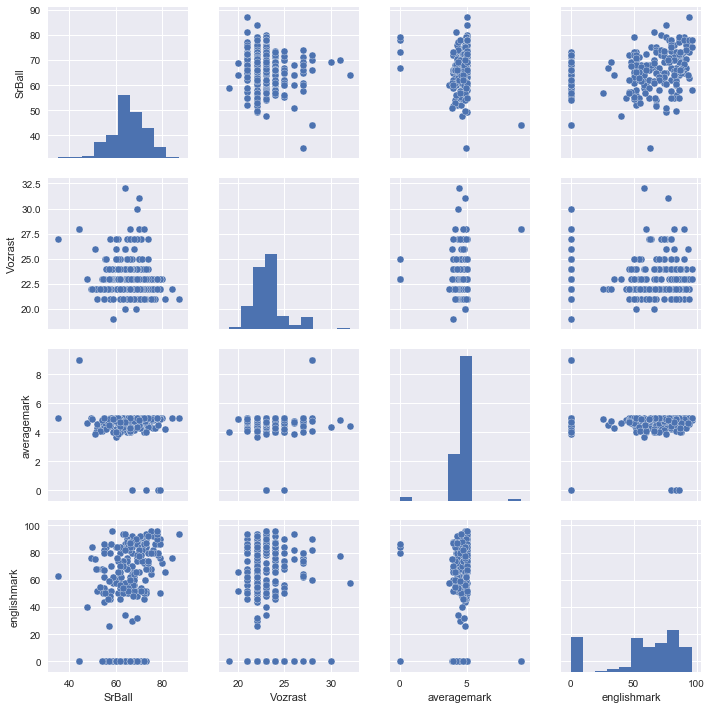

In [116]:
# c svg pairplot браузер начинает тормозить
import seaborn as sns


%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['SrBall', 'Vozrast', 'averagemark', 'englishmark']]);


In [144]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# университет и средний балл
data = []

for Universityname in df.Universityname.unique():
    data.append(
        go.Box(y=df[df.Universityname==Universityname].SrBall, name=Universityname)
    )

iplot(data, show_link = False)

# год выпуска и возраст
data = []

for VypYear in df.VypYear.unique():
    data.append(
        go.Box(y=df[df.VypYear==VypYear].Vozrast, name=VypYear)
    )

iplot(data, show_link = False)

# год выпуска и средний балл

data = []

for VypYear in df.VypYear.unique():
    data.append(
        go.Box(y=df[df.VypYear==VypYear].SrBall, name=VypYear)
    )
iplot(data, show_link = False)

# пол и группа

x0 = df.SrBall[df['sex'] == True]
x1 = df.SrBall[df['sex'] == False]


trace1 = go.Histogram(
    x=x0,
    name='Male',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='Female',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

# работает и группа

x0 = df.SrBall[df['ifwork'] == True]
x1 = df.SrBall[df['ifwork'] == False]


trace1 = go.Histogram(
    x=x0,
    name='Work',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='NotWork',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

# самфин и группа

x0 = df.SrBall[df['selfpiad'] == True]
x1 = df.SrBall[df['selfpiad'] == False]


trace1 = go.Histogram(
    x=x0,
    name='СамПлатит',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='НеПлатит',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)